<a href="https://colab.research.google.com/github/rafaeldajuda/IA-COLAB/blob/main/modelo-classificacao-knn-esperanca-gafanhoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO SUPERVISIONADO - CLASSIFICAÇÃO - GAFANHOTOS X ESPERANÇAS

In [1]:
import pandas as pd

In [2]:
dados = pd.read_excel('gaf_esp.xlsx')
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [3]:
dados.tail()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


* Existem três caracteríscas (colunas), "Comprimento do Abdômen", "Comprimento das Antenas" e "Espécie"
* O comprimento do abdômen e das antenas classificam a espécie


In [4]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [5]:
dados.shape

(100, 3)

* Principais estatísticas dos dados

In [7]:
dados.groupby("Espécie").describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

* Principais estatísticas por espécie (agrupado)

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

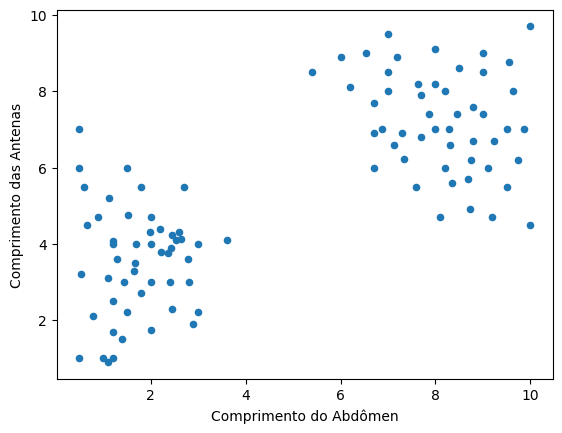

In [8]:
dados.plot.scatter(x='Comprimento do Abdômen', y='Comprimento das Antenas')

* Gráfico de dispersão

## SciKit Learn

https://scikit-learn.org/stable/

In [ ]:
# from sklearn import *

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = dados[['Comprimento do Abdômen', 'Comprimento das Antenas']]
x

,Comprimento do Abdômen,Comprimento das Antenas
0,0.50,7.0
1,0.50,6.0
2,0.60,5.5
3,0.65,4.5
4,0.54,3.2
...,...,...
95,9.75,6.2
96,6.20,8.1
97,9.20,4.7
98,9.10,6.0


In [13]:
y = dados['Espécie']
y

,Espécie
0,Gafanhoto
1,Gafanhoto
2,Gafanhoto
3,Gafanhoto
4,Gafanhoto
...,...
95,Esperança
96,Esperança
97,Esperança
98,Esperança


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

* stratify: equilibra a distribuição de classes, evitando que os dados de teste e treino ficam desequilibrado, não pendendo para uma classe.

In [18]:
list(y_train).count('Gafanhoto')

40

In [19]:
list(y_train).count('Esperança')

40

In [21]:
y_train

,Espécie
65,Esperança
2,Gafanhoto
10,Gafanhoto
16,Gafanhoto
18,Gafanhoto
...,...
67,Esperança
86,Esperança
35,Gafanhoto
71,Esperança


## Modelo KNN - KNeighborsClassifier - Classificação por Vizinhos


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

In [25]:
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
modelo_classificador.predict([[8, 6]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

In [27]:
y_predito = modelo_classificador.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_true=y_test, y_pred=y_predito)

1.0

* 1.0 seria 100% de acerto
* É um bom valor, porém não se deve confiar em dados com alto índices de acertos, principalmente 100%
* Resultados com 100% de acerto são chamados de overfiting, que é quando o modelo decora os dados em vez de aprender com eles, ou seja, não está prenvendo bem os resultados, e sim, dando uma resposta "decorada"